### *Task 3- Customer Segmentation / Clustering*

In [15]:
# Importing Libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Load Datasets

customers = pd.read_csv("C:/Users/SHUBHAM/Downloads/Customers.csv")
transactions = pd.read_csv("C:/Users/SHUBHAM/Downloads/Transactions.csv")

In [17]:
# Convert date columns to datetime

customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [18]:
# Merge datasets

data = transactions.merge(customers, on='CustomerID')

In [19]:
# Feature Engineering


customer_features = data.groupby('CustomerID').agg({
    'TotalValue': 'sum',               # Total spending
    'TransactionID': 'count',          # Total transactions
    'Quantity': 'sum',                 # Total products purchased
    'Price': 'mean',                   # Average order value
    'Region': 'first'                  # Customer region
}).reset_index()

In [20]:
# One-hot encode the 'Region' column

customer_features = pd.get_dummies(customer_features, columns=['Region'], drop_first=True)

In [27]:
# Standardize numerical features

scaler = StandardScaler()
numerical_cols = ['TotalValue', 'TransactionID', 'Quantity', 'Price']
customer_features[numerical_cols] = scaler.fit_transform(customer_features[numerical_cols])

In [22]:
# Clustering: Finding the optimal number of clusters using Davies-Bouldin Index

db_scores = []
for k in range(2, 11):  # Clusters from 2 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(customer_features[numerical_cols])
    db_index = davies_bouldin_score(customer_features[numerical_cols], clusters)
    db_scores.append((k, db_index))


C:\Users\SHUBHAM\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\SHUBHAM\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\SHUBHAM\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\SHUBHAM\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak o

In [23]:
# Set environment variable to avoid MKL memory issue
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [24]:
# Find the optimal number of clusters

optimal_k = sorted(db_scores, key=lambda x: x[1])[0][0]

In [29]:
# Final clustering with optimal number of clusters

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(customer_features[numerical_cols])

C:\Users\SHUBHAM\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KeyError: 'Cluster'

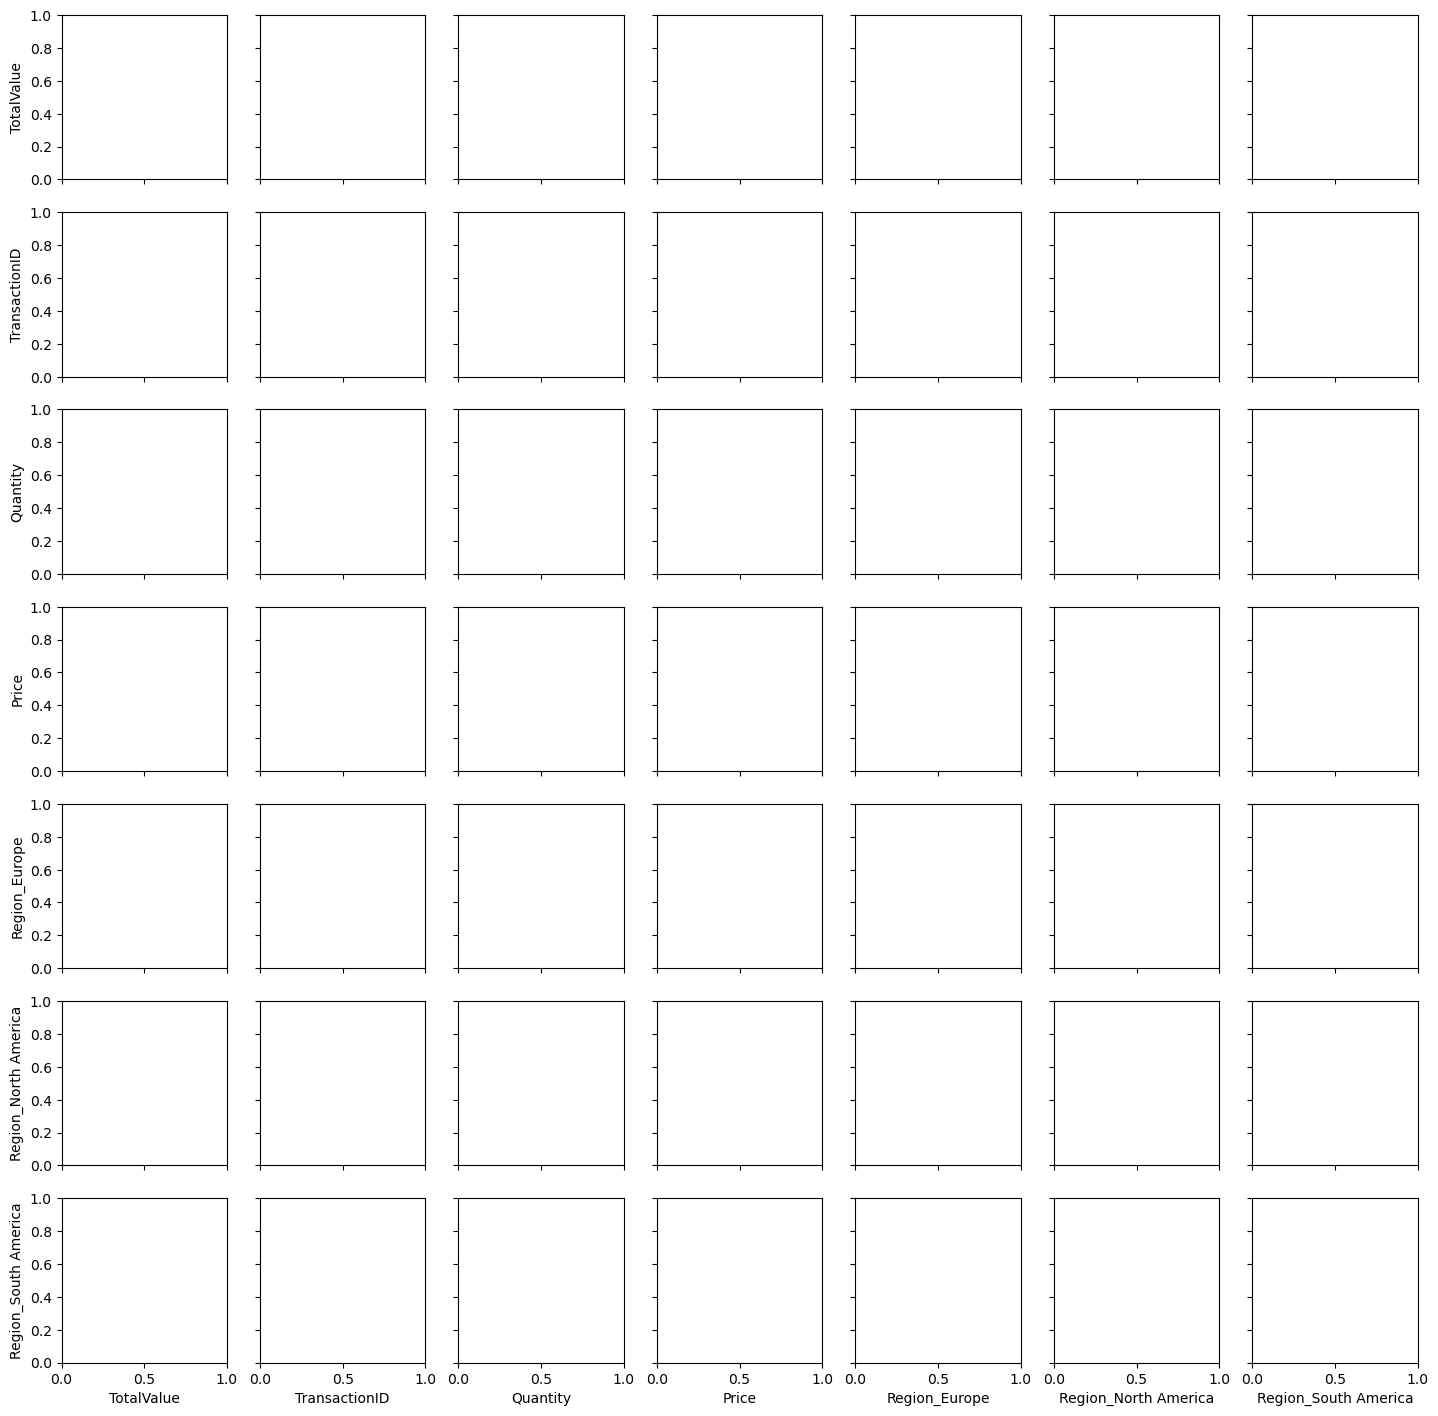

In [25]:
sns.pairplot(customer_features, hue='Cluster', diag_kind='kde', palette='tab10')
plt.suptitle("Pair Plot of Clusters", y=1.02)
plt.show()


In [ ]:
# Visualize clusters in 2D using PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(customer_features[numerical_cols])
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=customer_features['Cluster'], palette='tab10')
plt.title('Clusters Visualized in 2D')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [ ]:
# Output the DB Index and number of clusters

db_index = davies_bouldin_score(customer_features[numerical_cols], customer_features['Cluster'])
print(f"Optimal number of clusters: {optimal_k}")
print(f"Davies-Bouldin Index(BD Index): {db_index}")

In [ ]:
# Save results to CSV

customer_features.to_csv('CustomerSegmentation.csv', index=False)
print("Customer segmentation results saved to CustomerSegmentation.csv.")